In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
lamda0 = 1000 #нм
n = 10000 #точек 
time = 20#фс 20 * 10 ^ (-15)
c = 3. * 10** (8) # м/с
T0 = 0.05#

dt = 0.0002
dz = 0.00004
t=0.3
z = 0.2
Nz = z / dz
Nt = 2 * t / dt


def eval_b1():
    B1 = 0.696163
    w1 = (2. * np.pi * c)/(0.0684043*10**(-6)) 
    w = (2. * np.pi * c)/(10**(-6))

    beta1 = (B1 * w**2 * w1**2)/(c* (-w**2 + w1**2)**2 * np.sqrt(1. + (B1 * w1**2)/(-w**2 + w1**2))) + np.sqrt(1. + (B1 * w1**2)/(-w**2 + w1**2))/c
    return beta1

def eval_b2():
    B1 = 0.696163
    w1 = (2. * np.pi * c)/(0.0684043*10**(-6)) 
    w = (2. * np.pi * c)/(10**(-6))
    B2 = 0.4079426
    w2 = (2 * np.pi * c)/(0.1162414*10**(-6))
    beta2 = (w * ((2 * B1 * w * w1**2)/(-w**2 + w1**2)**2 + (2 * B2 * w * w2 **2)/(-w**2 + w2**2)**2))/(2 * c * np.sqrt(1 + (B1 * w1**2)/(-w**2 + w1**2) + (B2 * w2**2)/(-w**2 + w2**2))) + np.sqrt(1 + (B1* w1** 2)/(-w**2 + w1**2) + (B2 * w2**2)/(-w**2 + w2**2))/c
    return beta2

beta1 = eval_b1()
beta2 = eval_b2()
beta1 = beta1 * 10 ** 9
beta2 = beta2 * 10 ** 9
print(beta1, beta2)


4.353821341267787 4.865877335533778


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


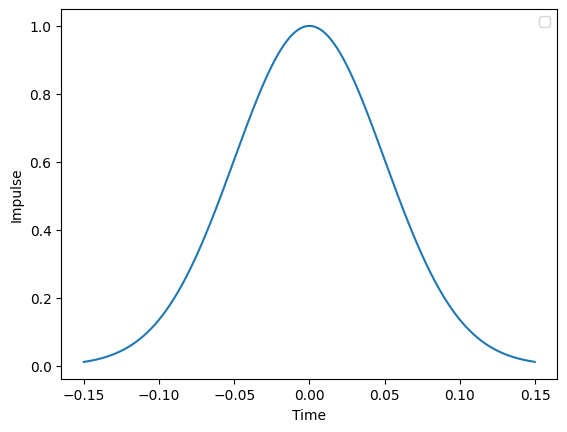

In [163]:
T0=0.05
def impulse1(t):
    return  np.e ** (-1. * t ** 2 / (2. * T0 ** 2))

z_array = np.arange(0., z, dz)
t_array = np.arange(-t/2., t/2., dt)
q = np.zeros((len(z_array), len(t_array)), dtype=complex)

first_layer = []
for t_i in t_array:
    res = impulse1(t_i)
    first_layer.append(res)
q[0] = first_layer

graph = []
for q_i in q[0]:
    graph.append(abs(q_i))

plt.plot(t_array, graph)
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()

## Первое моделироваеие

In [164]:
dz = 0.05 * 10 ** (-5)
Nz = 10000
A = []
A.append(first_layer)

for i in range(1, Nz):
    new_layer = []
    for j in range(0, len(t_array)):
        if j != 0:
            cur_val = A[i - 1][j] - beta1  / dt * (A[i - 1][j] - A[i - 1][j - 1]) * dz
            
        else :
             cur_val = 0
             
        new_layer.append(cur_val)
    A.append(new_layer)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


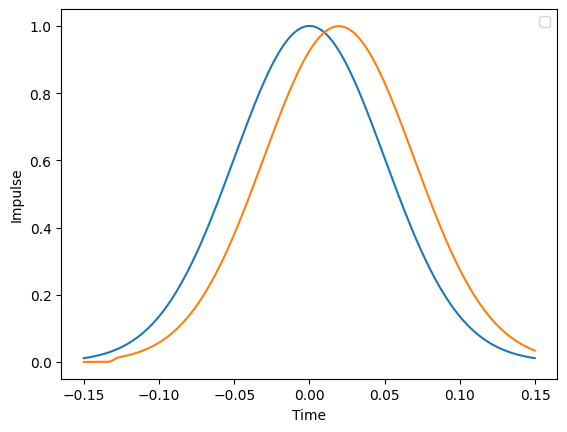

In [165]:
impulse_plot1 = []
impulse_plot2 = []
ind1 = 0
ind2 = 8999

for i in range(0, Nz):
    impulse_plot1.append(A)

def draw_three_impulses(t_array, impulse1, impulse2):
    plt.plot(t_array, impulse1)
    plt.plot(t_array, impulse2)
    plt.xlabel("Time")
    plt.ylabel('Impulse')
    plt.legend()
    plt.show()

draw_three_impulses(t_array, A[ind1], A[ind2])

In [166]:
max1 = np.array(A[ind1]).max()
max2 = np.array(A[ind2]).max()
t_max1 = 0
t_max2 = 0
rem_ind1 = 0
rem_ind2 = 0
for i in range(0, len(t_array)):
    if A[ind1][i] == max1:
        t_max1 = t_array[i]
        rem_ind1 = i
    if A[ind2][i] == max2:
        t_max2 = t_array[i]
        rem_ind2 = i

print((rem_ind2 - rem_ind1) * dz * 100. / (t_max2 - t_max1), 1 / beta1)

0.24999999999999287 0.2296832877641255


## Второе моделирование

In [176]:

q = np.zeros((len(z_array), len(t_array)), dtype=complex)
T0 = 0.01
def impulse1(t):
    return  np.e ** (-1. * t ** 2 / (2. * T0 ** 2))

first_layer = []
for t_i in t_array:
    res = impulse1(t_i)
    first_layer.append(res)
q[0] = first_layer

In [177]:
lamda = dz / (2.* dt ** 2)
lamda = lamda 
ln = len(t_array)
A = np.zeros((ln, ln), dtype=complex)
for i in range(0, ln):
    A[i][i] = lamda + 1j

for i in range(0, ln):
    A[i][((ln + i - 1)) % ln] = - lamda / 2.
    A[i][((ln + i + 1)) % ln] = - lamda / 2.

In [178]:
inverse_matrix = np.linalg.inv(A)

for i in range(0, 10):
    F = np.zeros((len(t_array), ), dtype=complex)
    for k in range(0, 10):
        for j in range(0, len(t_array)):

            # r = q[m+1][j]
            if k != 0:
                r = q[i + 1][j]
            else :
                r = q[i][j]
                
            if (j == 0):
                F[j] = lamda/2 * (q[i][j + 1] + 0) + (1j - lamda) * q[i][j]   
            if (j == len(t_array) - 1):
                F[j] = lamda/2 * (0 + q[i][j - 1]) + (1j - lamda) * q[i][j] 
            if j > 0  and j < len(t_array) - 1:
                F[j] = lamda/2 * (q[i][j + 1] + q[i][j - 1]) + (1j - lamda) * q[i][j]
        
            new_layer = np.dot(inverse_matrix, F)
            q[i + 1] = new_layer    

    print(i)

0
1
2
3
4
5
6
7
8
9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


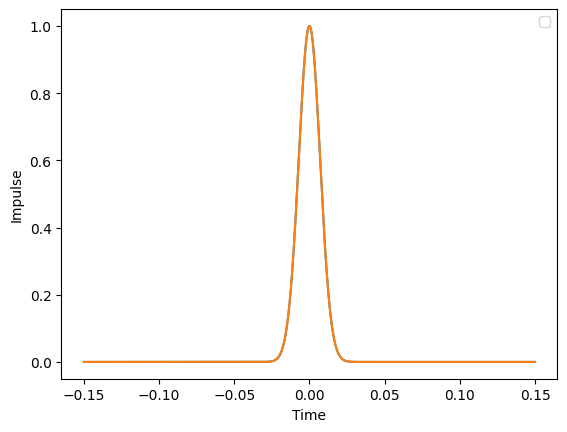

In [179]:
graph1 = []
for q_i in q[0]:
    graph1.append(abs(q_i)**2)

graph2 = []
for q_i in q[8]:
    graph2.append(abs(q_i) ** 2)  


plt.plot(t_array, graph1)
plt.plot(t_array, graph2)

#plt.scatter(t, impulse3)
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()

## Третье моделироваение

In [167]:

q = np.zeros((len(z_array), len(t_array)), dtype=complex)
T0 = 0.01
def impulse1(t):
    return  np.e ** (-1. * t ** 2 / (2. * T0 ** 2))

first_layer = []
for t_i in t_array:
    res = impulse1(t_i)
    first_layer.append(res)
q[0] = first_layer

In [168]:
print(len(t_array), len(z_array))

1500 5000


In [169]:
lamda = dz / (2.* dt ** 2)
lamda = lamda 
ln = len(t_array)
A = np.zeros((ln, ln), dtype=complex)
for i in range(0, ln):
    A[i][i] = lamda + 1j

for i in range(0, ln):
    A[i][((ln + i - 1)) % ln] = - lamda / 2.
    A[i][((ln + i + 1)) % ln] = - lamda / 2.

In [170]:
lamda

6.250000000000001

In [172]:
inverse_matrix = np.linalg.inv(A)

for i in range(0, 10):
    F = np.zeros((len(t_array), ), dtype=complex)
    for k in range(0, 10):
        for j in range(0, len(t_array)):

            # r = q[m+1][j]
            if k != 0:
                r = q[i + 1][j]
            else :
                r = q[i][j]
                
            if (j == 0):
                F[j] = lamda/2 * (q[i][j + 1] + 0) + (1j - lamda) * q[i][j] + beta2 * 50. * dt * ((abs(r) ** 2) * r + (abs(q[i][j] ** 2) * q[i][j]))
                                                                                    
            if (j == len(t_array) - 1):
                F[j] = lamda/2 * (0 + q[i][j - 1]) + (1j - lamda) * q[i][j] + beta2* 50. * dt * ((abs(r) ** 2) * r + (abs(q[i][j] ** 2) * q[i][j]))

            if j > 0  and j < len(t_array) - 1:
                F[j] = lamda/2 * (q[i][j + 1] + q[i][j - 1]) + (1j - lamda) * q[i][j] + beta2 * 50. * dt * ((abs(r) ** 2) * r + (abs(q[i][j] ** 2) * q[i][j]))

        
            new_layer = np.dot(inverse_matrix, F)
            q[i + 1] = new_layer    

    print(i)

0
1
2
3
4
5
6
7
8
9


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


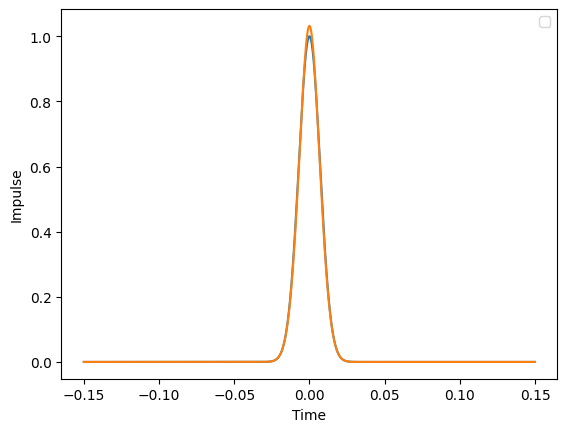

In [175]:
graph1 = []
for q_i in q[0]:
    graph1.append(abs(q_i)**2)

graph2 = []
for q_i in q[8]:
    graph2.append(abs(q_i) ** 2)  


plt.plot(t_array, graph1)
plt.plot(t_array, graph2)

#plt.scatter(t, impulse3)
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()
